In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Error (recording) condition MLP classifier

As expected, when using the KNN to classify the error condition, the performance for audio source only is poor. Testing to see if using the MLP improves the performance, as it was shown in Furkan thesis that it was well suited for phonation mode classification. 

In [5]:
# Example of calling the function
DATA_FILE = 'data/voice_data_thesis_preprocessed.csv'
HIDDEN_LAYER_SIZE = 12
RANDOM_STATE = 42

from scripts.mlp_classifier import train_mlp, evaluate_mlp
from scripts.utils import prepare_data, plot_confusion_matrix, standardize_x_data
from sklearn.model_selection import train_test_split

## 1. All Data

Mean cross-validated F1 score: 0.9977001735950337
f1 score:  0.9988311020484149
Classification Report:
                   precision    recall  f1-score   support

      arched_back       1.00      1.00      1.00      1943
  chest_breathing       1.00      1.00      1.00      1945
          correct       1.00      1.00      1.00      2189
high_articulation       1.00      1.00      1.00      1892
     hunched_back       1.00      1.00      1.00      1927
 low_articulation       1.00      0.99      1.00      1795
         sideways       1.00      1.00      1.00      2003

         accuracy                           1.00     13694
        macro avg       1.00      1.00      1.00     13694
     weighted avg       1.00      1.00      1.00     13694



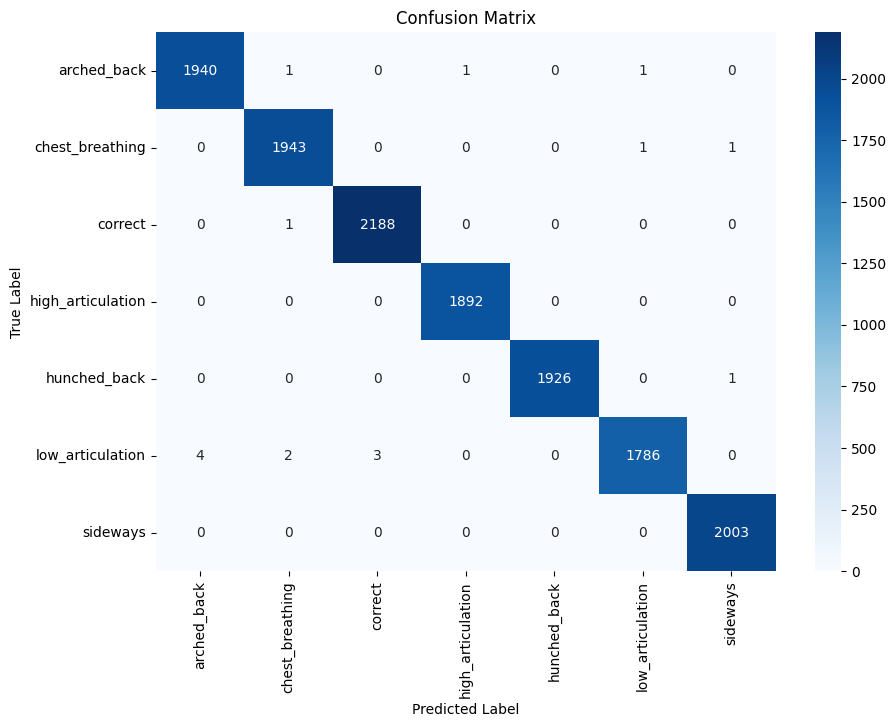

In [6]:
#prepare data
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition')
class_names=y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_mlp(x_train, y_train, HIDDEN_LAYER_SIZE, RANDOM_STATE)

# Evaluate MLP on test set
f1, class_report, conf_matrix = evaluate_mlp(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

#### Top 5 features

Selected features:  Index(['computer_pose_landmark_5_z', 'computer_pose_landmark_6_z',
       'computer_pose_landmark_8_z', 'computer_pose_landmark_9_z',
       'computer_pose_landmark_12_z'],
      dtype='object')
Mean cross-validated F1 score: 0.7552511812030935
f1 score:  0.7602800701046615
Classification Report:
                   precision    recall  f1-score   support

      arched_back       0.89      0.91      0.90      1943
  chest_breathing       0.54      0.52      0.53      1945
          correct       0.80      0.81      0.81      2189
high_articulation       0.58      0.57      0.57      1892
     hunched_back       0.99      0.99      0.99      1927
 low_articulation       0.58      0.62      0.60      1795
         sideways       0.92      0.87      0.90      2003

         accuracy                           0.76     13694
        macro avg       0.76      0.76      0.76     13694
     weighted avg       0.76      0.76      0.76     13694



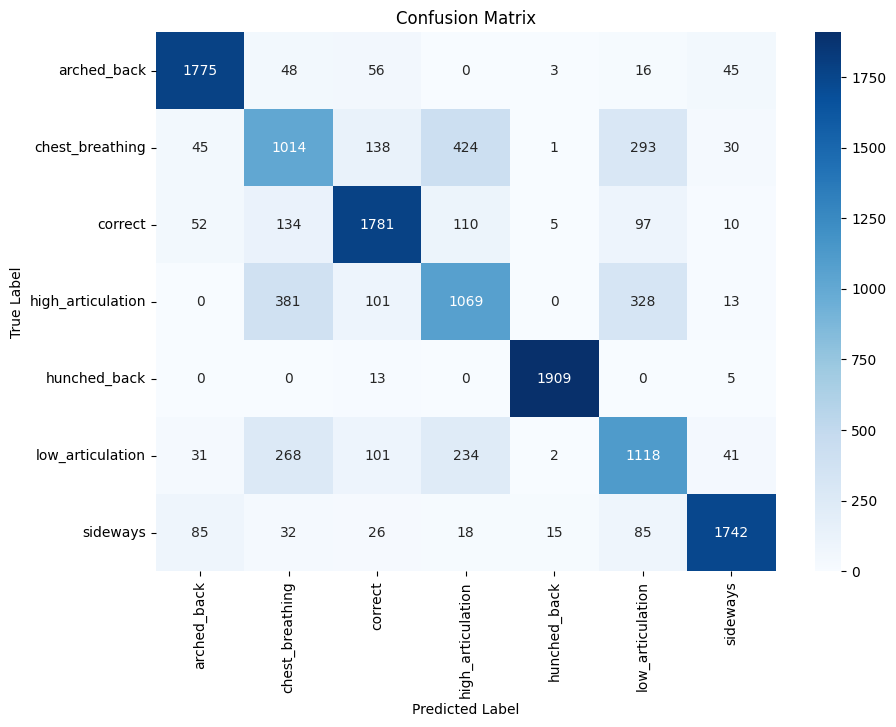

In [7]:
#prepare data
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', num_features=5)
class_names=y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_mlp(x_train, y_train, HIDDEN_LAYER_SIZE, RANDOM_STATE)

f1, class_report, conf_matrix = evaluate_mlp(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

## 2. Audio Only

In [8]:
modalities = [
    "audio"
]

Mean cross-validated F1 score: 0.3684471117065441
f1 score:  0.37323236907572466
Classification Report:
                   precision    recall  f1-score   support

      arched_back       0.33      0.53      0.41      1943
  chest_breathing       0.47      0.33      0.39      1945
          correct       0.28      0.24      0.26      2189
high_articulation       0.42      0.46      0.44      1892
     hunched_back       0.42      0.33      0.37      1927
 low_articulation       0.39      0.49      0.43      1795
         sideways       0.40      0.29      0.33      2003

         accuracy                           0.38     13694
        macro avg       0.39      0.38      0.38     13694
     weighted avg       0.38      0.38      0.37     13694



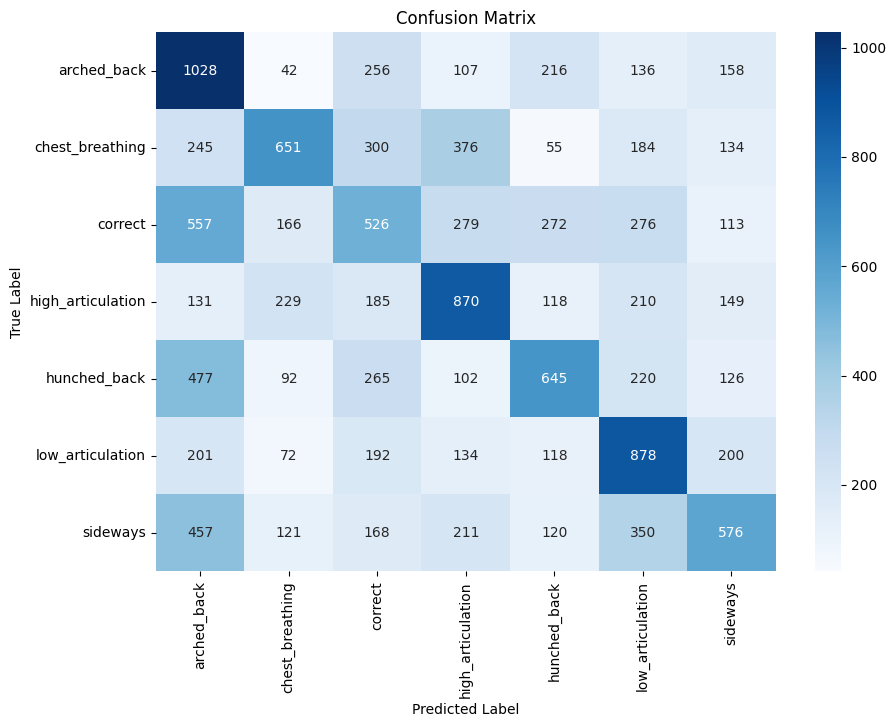

In [9]:
#prepare data
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', modalities=modalities)
class_names=y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_mlp(x_train, y_train, HIDDEN_LAYER_SIZE, RANDOM_STATE)

f1, class_report, conf_matrix = evaluate_mlp(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

#### Only top 5 audio features

Selected features:  Index(['computer_spec_cent', 'computer_mfcc_1', 'computer_mfcc_3',
       'computer_mfcc_5', 'computer_mfcc_10'],
      dtype='object')
Mean cross-validated F1 score: 0.25526405251798084
f1 score:  0.2517230959009438
Classification Report:
                   precision    recall  f1-score   support

      arched_back       0.23      0.29      0.26      1943
  chest_breathing       0.27      0.40      0.32      1945
          correct       0.22      0.36      0.27      2189
high_articulation       0.31      0.30      0.31      1892
     hunched_back       0.30      0.18      0.23      1927
 low_articulation       0.38      0.13      0.20      1795
         sideways       0.25      0.13      0.17      2003

         accuracy                           0.26     13694
        macro avg       0.28      0.26      0.25     13694
     weighted avg       0.28      0.26      0.25     13694



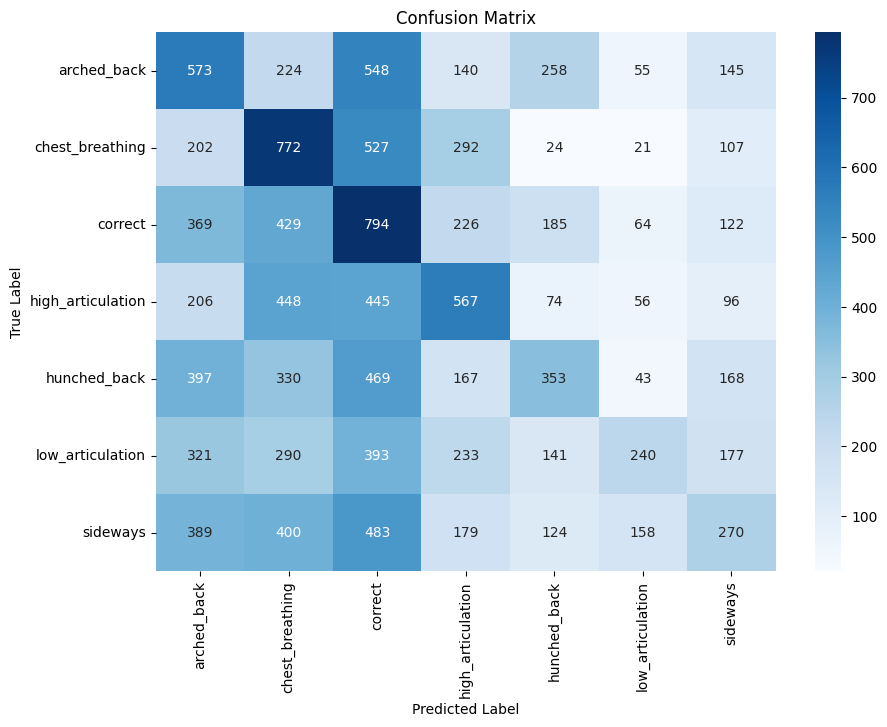

In [10]:
#prepare data
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', modalities=modalities, num_features=5)
class_names=y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_mlp(x_train, y_train, HIDDEN_LAYER_SIZE, RANDOM_STATE)

f1, class_report, conf_matrix = evaluate_mlp(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

#### Standardized data

Mean cross-validated F1 score: 0.3684471117065441
f1 score:  0.37323236907572466
Classification Report:
                   precision    recall  f1-score   support

      arched_back       0.33      0.53      0.41      1943
  chest_breathing       0.47      0.33      0.39      1945
          correct       0.28      0.24      0.26      2189
high_articulation       0.42      0.46      0.44      1892
     hunched_back       0.42      0.33      0.37      1927
 low_articulation       0.39      0.49      0.43      1795
         sideways       0.40      0.29      0.33      2003

         accuracy                           0.38     13694
        macro avg       0.39      0.38      0.38     13694
     weighted avg       0.38      0.38      0.37     13694



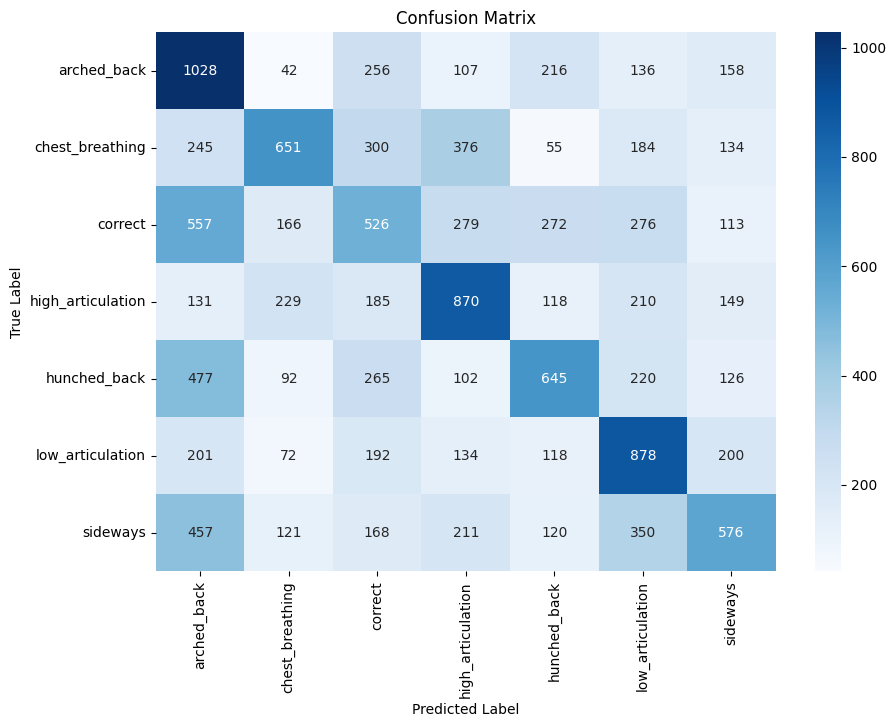

In [11]:
#prepare data
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', modalities=modalities)
class_names=y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)
x_train, x_test = standardize_x_data(x_train, x_test)

#train and evaluate the model
pipeline = train_mlp(x_train, y_train, HIDDEN_LAYER_SIZE, RANDOM_STATE)

f1, class_report, conf_matrix = evaluate_mlp(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

Standardizing the data doesnt seem to impact the performance of the model.

## 3. Video Only

In [12]:
modalities = [
    "video"
]

Mean cross-validated F1 score: 0.9996896475989656
f1 score:  0.9997809060719973
Classification Report:
                   precision    recall  f1-score   support

      arched_back       1.00      1.00      1.00      1943
  chest_breathing       1.00      1.00      1.00      1945
          correct       1.00      1.00      1.00      2189
high_articulation       1.00      1.00      1.00      1892
     hunched_back       1.00      1.00      1.00      1927
 low_articulation       1.00      1.00      1.00      1795
         sideways       1.00      1.00      1.00      2003

         accuracy                           1.00     13694
        macro avg       1.00      1.00      1.00     13694
     weighted avg       1.00      1.00      1.00     13694



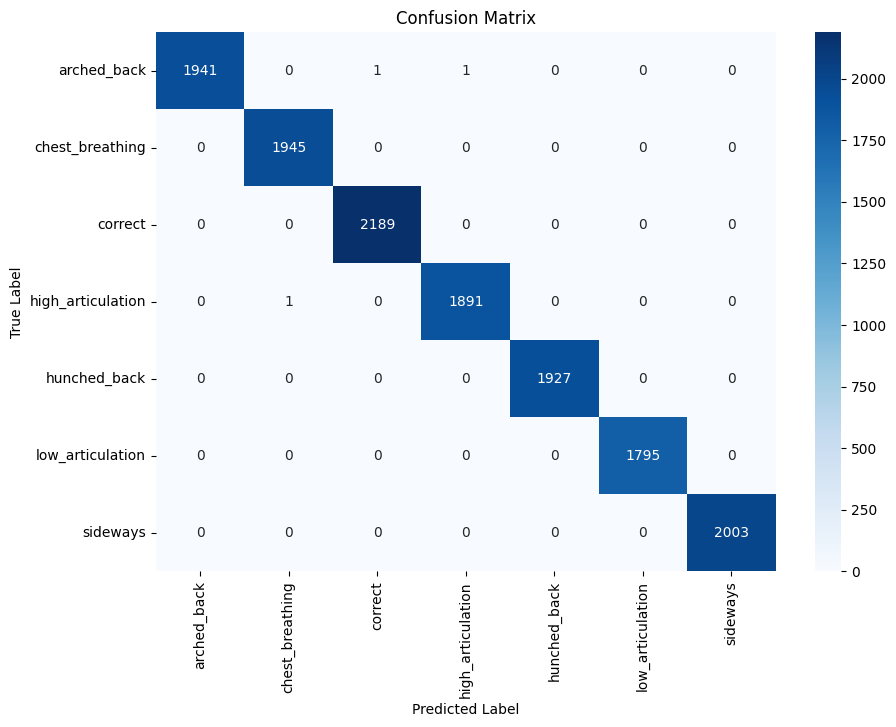

In [13]:
#prepare data
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', modalities=modalities)
class_names=y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_mlp(x_train, y_train, HIDDEN_LAYER_SIZE, RANDOM_STATE)

f1, class_report, conf_matrix = evaluate_mlp(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

#### Only top 5 Video features

Selected features:  Index(['computer_pose_landmark_5_z', 'computer_pose_landmark_6_z',
       'computer_pose_landmark_8_z', 'computer_pose_landmark_9_z',
       'computer_pose_landmark_12_z'],
      dtype='object')
Mean cross-validated F1 score: 0.7552511812030935
f1 score:  0.7602800701046615
Classification Report:
                   precision    recall  f1-score   support

      arched_back       0.89      0.91      0.90      1943
  chest_breathing       0.54      0.52      0.53      1945
          correct       0.80      0.81      0.81      2189
high_articulation       0.58      0.57      0.57      1892
     hunched_back       0.99      0.99      0.99      1927
 low_articulation       0.58      0.62      0.60      1795
         sideways       0.92      0.87      0.90      2003

         accuracy                           0.76     13694
        macro avg       0.76      0.76      0.76     13694
     weighted avg       0.76      0.76      0.76     13694



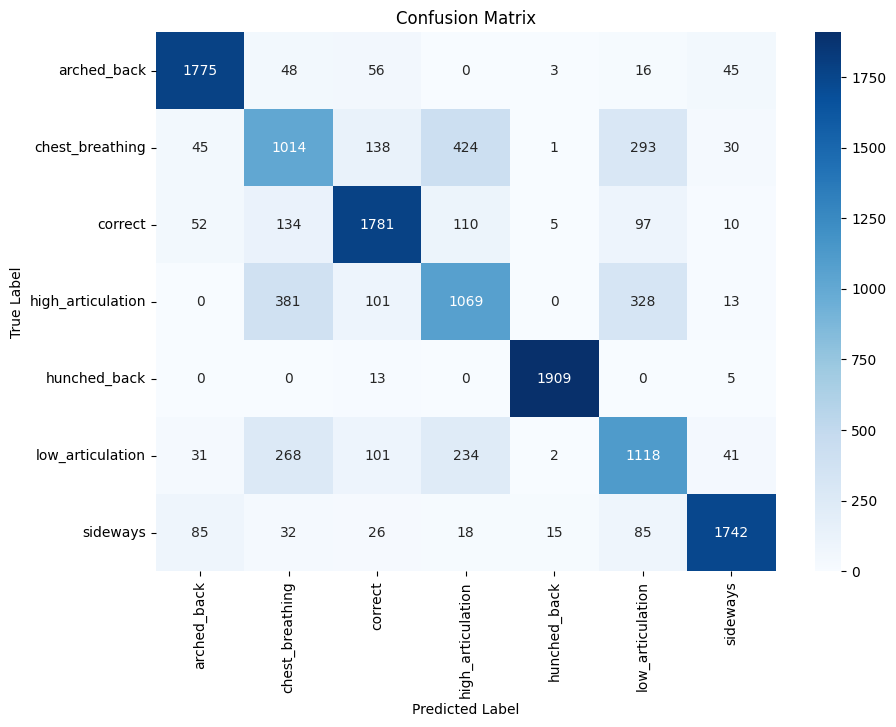

In [14]:
#prepare data
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', modalities=modalities, num_features=5)
class_names=y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_mlp(x_train, y_train, HIDDEN_LAYER_SIZE, RANDOM_STATE)

f1, class_report, conf_matrix = evaluate_mlp(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

## 4. Biosignal only

In [15]:
modalities = [
    "biosignals"
]

Mean cross-validated F1 score: 0.4512971818633057
f1 score:  0.4764737224735575
Classification Report:
                   precision    recall  f1-score   support

      arched_back       0.43      0.53      0.47      1943
  chest_breathing       0.76      0.70      0.73      1945
          correct       0.36      0.37      0.36      2189
high_articulation       0.95      0.52      0.67      1892
     hunched_back       0.33      0.67      0.44      1927
 low_articulation       0.52      0.54      0.53      1795
         sideways       0.41      0.10      0.16      2003

         accuracy                           0.48     13694
        macro avg       0.54      0.49      0.48     13694
     weighted avg       0.53      0.48      0.48     13694



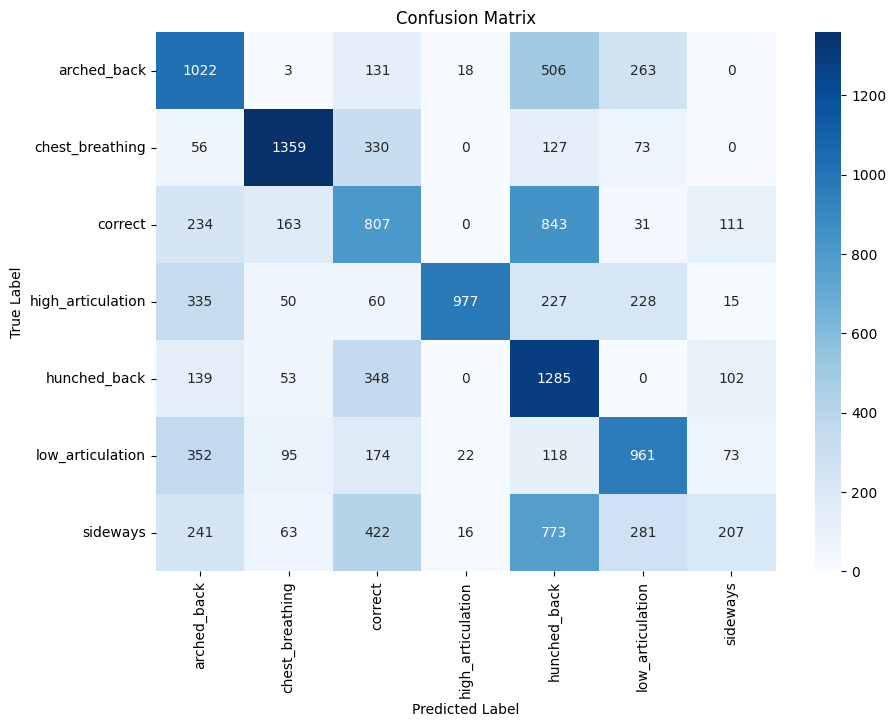

In [16]:
#prepare data
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', modalities=modalities)
class_names = y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_mlp(x_train, y_train, HIDDEN_LAYER_SIZE, RANDOM_STATE)

f1, class_report, conf_matrix = evaluate_mlp(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

# Separating classification of posture related flaws and other error conditions